<a href="https://colab.research.google.com/github/The-Mechanic-3/Data-Driven-Aerospace/blob/Colab/Homework_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request

# Load the image from the URL
url = "https://upload.wikimedia.org/wikipedia/commons/9/94/F4_p3_rgb_planedrop.jpg"
with urllib.request.urlopen(url) as url_response:
    img = Image.open(url_response)

# Convert the image to grayscale and to a NumPy array
img_gray = img.convert('L')
img_np = np.array(img_gray)

In [ ]:
U, S, V = np.linalg.svd(img_np)

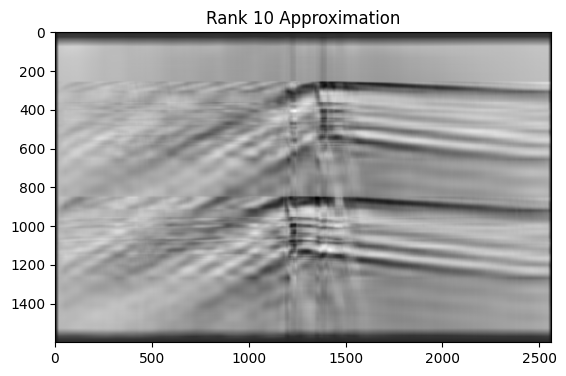

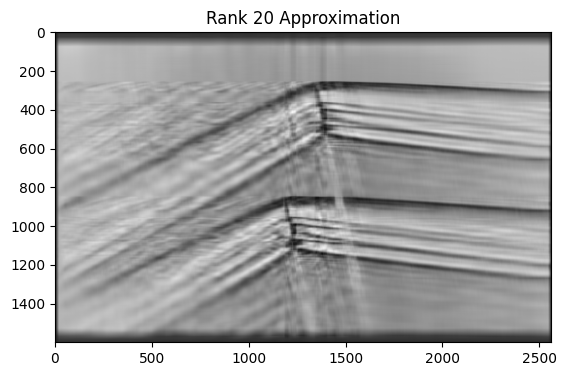

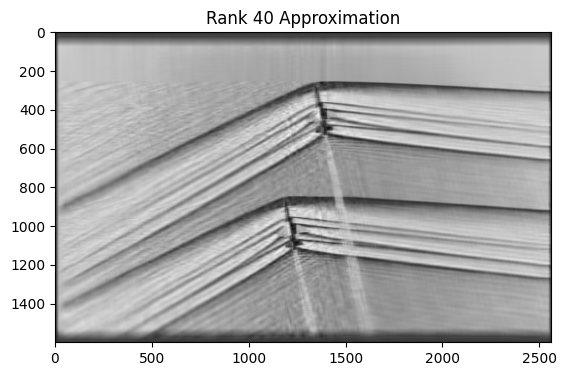

In [ ]:
ranks = [10, 20, 40]
for rank in ranks:
    img_approx = U[:, :rank] @ np.diag(S[:rank]) @ V[:rank, :]
    plt.imshow(img_approx, cmap='gray')
    plt.title(f'Rank {rank} Approximation')
    plt.show()

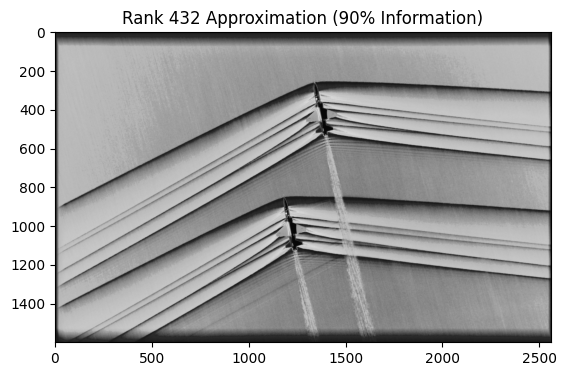

In [ ]:
total_energy = np.sum(S)
cumulative_energy = np.cumsum(S)
rank_90 = np.argmax(cumulative_energy / total_energy >= 0.9) + 1

img_approx_90 = U[:, :rank_90] @ np.diag(S[:rank_90]) @ V[:rank_90, :]
plt.imshow(img_approx_90, cmap='gray')
plt.title(f'Rank {rank_90} Approximation (90% Information)')
plt.show()

In [ ]:
import numpy as np

# Assuming U is already defined from the SVD computation
r = 50  # Choose a rank less than the number of rows (m)
U_r = U[:, :r]  # Extract the first r columns of U

# Calculate U times U Transpose
UUT = U_r @ U_r.T

# Check if UUT is close to the r x r identity matrix
# Change np.eye(r) to np.eye(UUT.shape[0]) to match the shape of UUT
# The error was here: Comparing a (1600, 1600) matrix to a (50, 50) slice of an identity matrix
# Solution: Extract the relevant (r x r) part of UUT for comparison
is_identity = np.allclose(UUT[:r, :r], np.eye(r))

print(f"Is U times U Transpose (for rank {r}) close to the r x r identity matrix? {is_identity}")

Is U times U Transpose (for rank 50) close to the r x r identity matrix? False


In [ ]:
import numpy as np

# Assuming U is already defined from the SVD computation
r = 50  # Choose a rank less than the number of rows (m)
U_r = U[:, :r]  # Extract the first r columns of U

# Calculate U Transpose times U
UTU = U_r.T @ U_r

# Check if UTU is close to the identity matrix
is_identity = np.allclose(UTU, np.eye(r))

print(f"Is U Transpose times U (for rank {r}) close to the identity matrix? {is_identity}")

Is U Transpose times U (for rank 50) close to the identity matrix? True


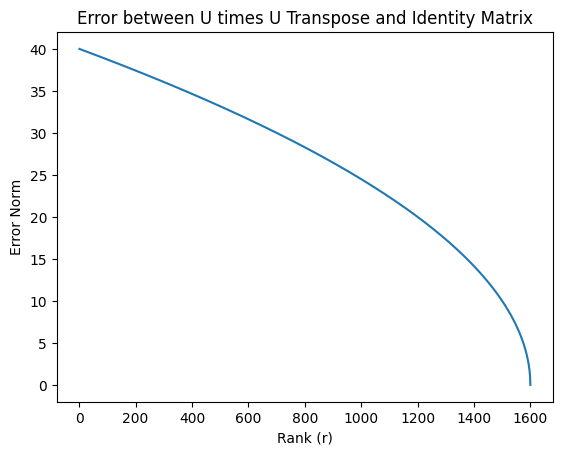

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming U and img_np are already defined
n = img_np.shape[0]  # Number of rows (n)
errors = []

for r in range(1, n + 1):
    U_r = U[:, :r]  # Extract the first r columns of U
    UUT = U_r @ U_r.T  # Calculate U times U Transpose
    error = np.linalg.norm(UUT - np.eye(n), ord='fro')  # Calculate error norm
    errors.append(error)

plt.plot(range(1, n + 1), errors)
plt.xlabel('Rank (r)')
plt.ylabel('Error Norm')
plt.title('Error between U times U Transpose and Identity Matrix')
plt.show()